<h1 style="font-size: 40px; text-align: center;">Market Segment &Predicting Customer Behavior</h1>
<h3 style="font-size: 20px; text-align: center;">Abdelkabir Sahnoun</h3>

## 1. Background
### Business Situation

CRISA is an Asian market research agency that specializes in tracking consumer purchase behavior in consumer goods (both durable and nondurable). In one major research project, CRISA tracks numerous consumer product categories (e.g., “detergents”), and, within each category, perhaps dozens of brands. To track purchase behavior, CRISA constituted household panels in over 100 cities and towns in India, covering most of the Indian urban market. The households were carefully selected using stratified sampling to ensure a representative sample; a subset of 600 records is analyzed here. The strata were defined on the basis of socioeconomic status and the market (a collection of cities).

CRISA has both transaction data (each row is a transaction) and household data (each row is a household), and for the household data it maintains the following information:
- Demographics of the households (updated annually)
- Possession of durable goods (car, washing machine, etc., updated annually.
- an “affluence index” is computed from this information)
- Purchase data of product categories and brands (updated monthly)
### Key Problems

CRISA has traditionally segmented markets on the basis of purchaser demographics. They would now like to segment the market based on two key sets of variables more directly related to the purchase process and to brand loyalty:
1. Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)
2. Basis of purchase (price, selling proposition)

Doing so would allow CRISA to gain information about what demographic attributes are associated with different purchase behaviors and degrees of brand loyalty, and thus deploy promotion budgets more effectively.

## 2. Loading the data file

In [1]:
import pandas as pd


In [2]:
# Load the .xlsx file
xlsx_path = "Assgt_clusBathSoap_Data.xlsx"
xls = pd.ExcelFile(xlsx_path)

# Display available sheet names
xls.sheet_names

['CodelList', 'DM_Sheet', 'Durables']

#### The Excel file contains the following sheets: ####
1. *CodelList*: contains metadata.
2. *DM_Sheet*: the main data sheet.
3. *Durables*: contains info on durable goods ownership per household.

In [3]:
# Load the main data sheet
df = pd.read_excel(xlsx_path, sheet_name='DM_Sheet')

# Show the first few rows and basic structure
df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,maxBrCd
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.376947
1,1010020,3,2,10,2,2,4,4,2,1,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.144902
2,1014020,2,3,10,2,4,5,6,4,1,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.545455
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.600000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.144578


### Dataset Structure

**Rows:**  
Each row represents a household (e.g., *MemberID*).

**Columns:**  
Total of 47 columns, including:

#### Demographics:
- *SEC*: Socio-Economic Class  
- *AGE*: Age of head of household  
- *SEX*: Gender  
- *EDU*: Education level  
- *HS*: Household size  
- *CHILD*: Number of children  

#### Behavioral Variables:
- **Proportion of purchases by brand:**  
  *PropCat1* to *PropCat15*

- **Loyalty Metric:**  
  *maxBrCd*: Max brand contribution (indicating potential brand loyalty)


In [4]:
# Summary statistics and data types
summary = df.describe(include='all')
data_info = df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Select only numeric columns for plotting
numeric_cols = df.select_dtypes(include='number').columns

# Return summary, missing values, and numeric column info
summary, missing_values[numeric_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Member id              600 non-null    int64  
 1   SEC                    600 non-null    int64  
 2   FEH                    600 non-null    int64  
 3   MT                     600 non-null    int64  
 4   SEX                    600 non-null    int64  
 5   AGE                    600 non-null    int64  
 6   EDU                    600 non-null    int64  
 7   HS                     600 non-null    int64  
 8   CHILD                  600 non-null    int64  
 9   CS                     600 non-null    int64  
 10  Affluence Index        600 non-null    int64  
 11  No. of Brands          600 non-null    int64  
 12  Brand Runs             600 non-null    int64  
 13  Total Volume           600 non-null    int64  
 14  No. of  Trans          600 non-null    int64  
 15  Value 

(          Member id         SEC         FEH          MT         SEX  \
 count  6.000000e+02  600.000000  600.000000  600.000000  600.000000   
 mean   1.104188e+06    2.500000    2.048333    8.178333    1.738333   
 std    4.560152e+04    1.118967    1.134964    4.294641    0.648510   
 min    1.010010e+06    1.000000    0.000000    0.000000    0.000000   
 25%    1.065295e+06    1.750000    1.000000    4.000000    2.000000   
 50%    1.106235e+06    2.500000    3.000000   10.000000    2.000000   
 75%    1.148292e+06    3.250000    3.000000   10.000000    2.000000   
 max    1.167670e+06    4.000000    3.000000   19.000000    2.000000   
 
               AGE         EDU          HS       CHILD          CS  ...  \
 count  600.000000  600.000000  600.000000  600.000000  600.000000  ...   
 mean     3.213333    4.043333    4.191667    3.233333    0.931667  ...   
 std      0.865489    2.190004    2.300090    1.217110    0.507372  ...   
 min      1.000000    0.000000    0.000000    1.00

## 3. Exploratory Data Analysis (EDA)

- **Shape:** 600 households × 47 features  
- **No missing values** across any column — dataset is clean  
- **Data Types:**  
  - 32 *float* columns  
  - 15 *int* columns  
  - Mostly numerical data


### Key Feature Groups

#### Demographics
- *SEC*, *AGE*, *SEX*, *EDU*, *HS*, *CHILD*, *Affluence Index*  
  → Describe household structure and socio-economic status

#### Purchase Behavior
- *Total Volume*, *No. of Trans*, *Value*  
  → Reflect overall purchase patterns  
- *No. of Brands*, *Brand Runs*  
  → Useful for brand loyalty metrics  
- *Trans / Brand Runs*, *Vol/Tran*, *Avg. Price*  
  → Derived behavior metrics showing efficiency and value behavior

#### Discount Sensitivity
- *Pur Vol No Promo %*, *Promo 6 %*, *Other Promo %*  
  → Indicate household response to discounts and promotions

#### Brand Loyalty
- *maxBrCd*: Highest proportion of purchases to a single brand  
  → Proxy metric for brand loyalty  
- *Br. Cd.* and *PropCat* columns  
  → Show how spending is distributed across brands/categories


## 4. Data Visualization

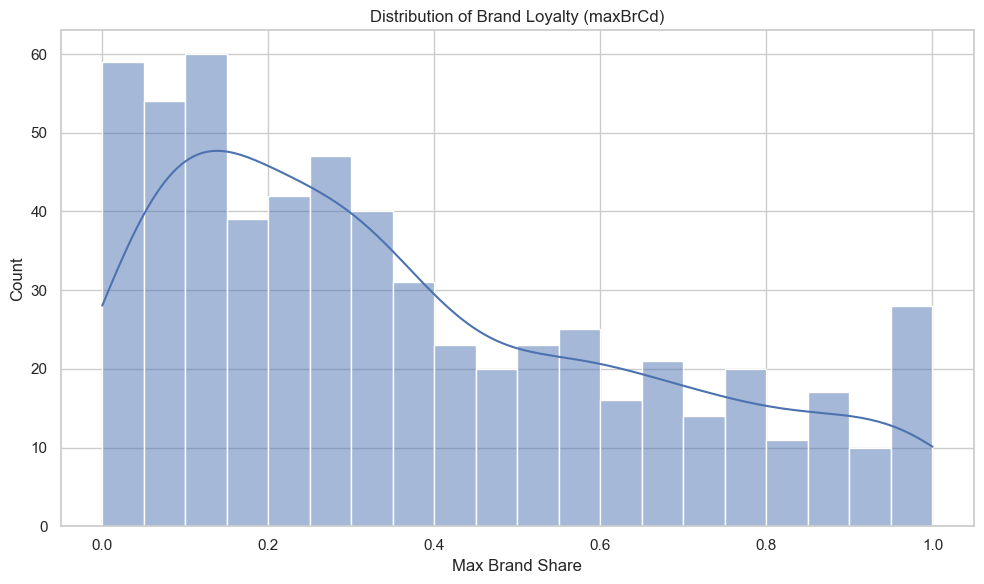

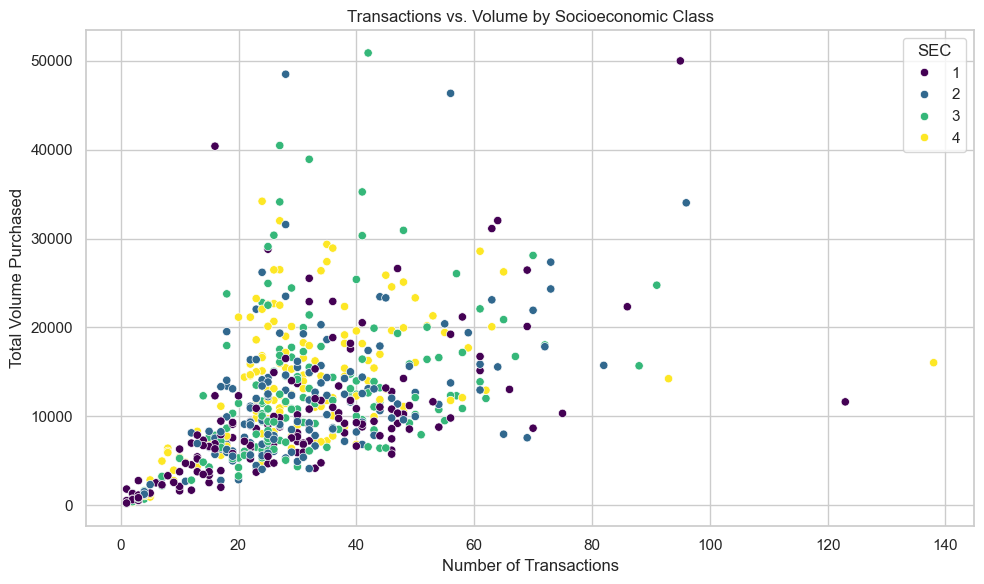

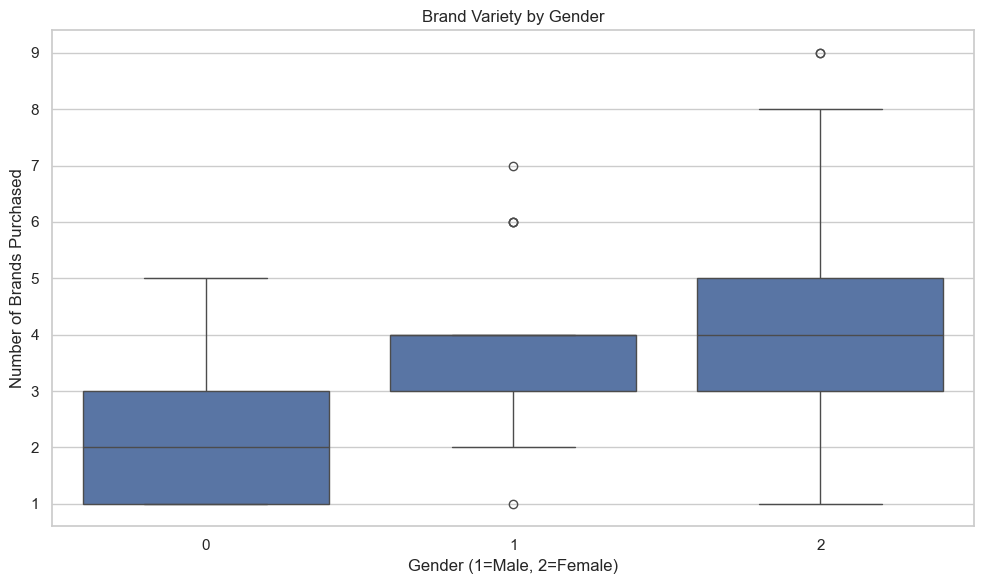

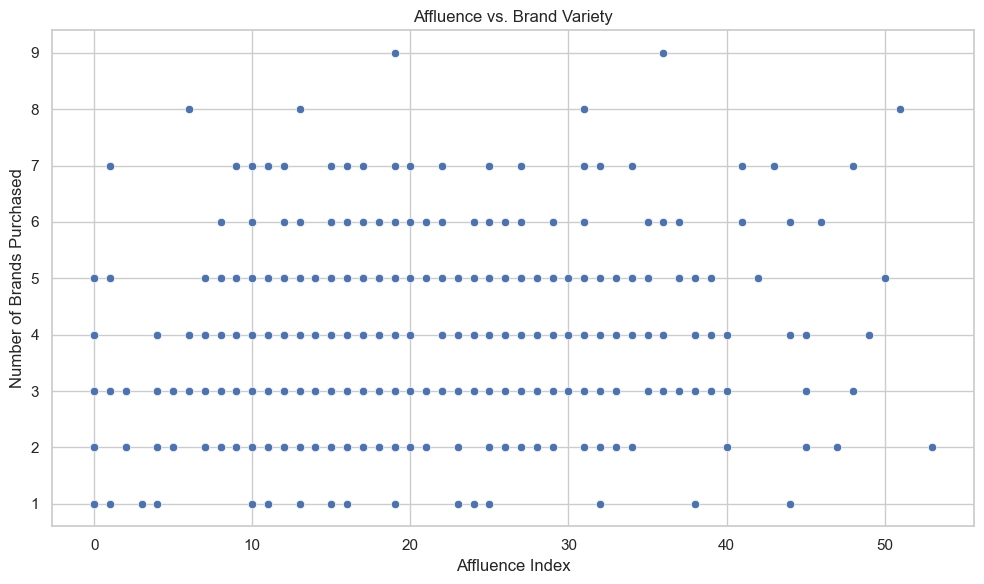

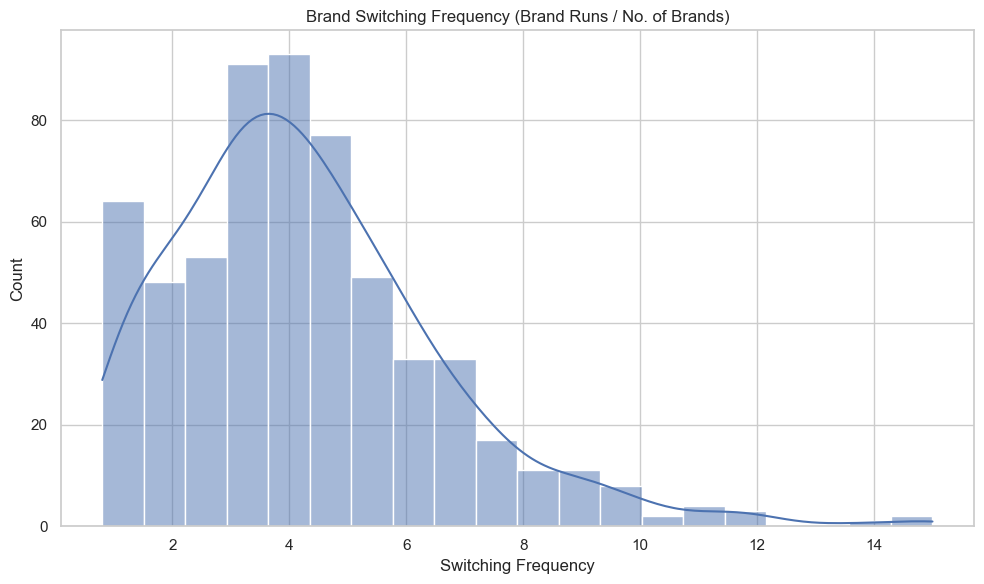

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create individual plots
plt.figure(figsize=(10, 6))
sns.histplot(df['maxBrCd'], bins=20, kde=True)
plt.title('Distribution of Brand Loyalty (maxBrCd)')
plt.xlabel('Max Brand Share')
plt.ylabel('Count')
plt.tight_layout()
# Save figure
plt.savefig("Distribution of Brand Loyalty.png", dpi=300, bbox_inches='tight')

plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='No. of  Trans', y='Total Volume', data=df, hue='SEC', palette='viridis')
plt.title('Transactions vs. Volume by Socioeconomic Class')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Volume Purchased')
plt.tight_layout()
# Save figure
plt.savefig("Transactions vs. Volume by Socioeconomic Class.png", dpi=300, bbox_inches='tight')

plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='No. of Brands', data=df)
plt.title('Brand Variety by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Number of Brands Purchased')
plt.tight_layout()
# Save figure
plt.savefig("Brand Variety by Gender.png", dpi=300, bbox_inches='tight')

plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Affluence Index', y='No. of Brands', data=df)
plt.title('Affluence vs. Brand Variety')
plt.xlabel('Affluence Index')
plt.ylabel('Number of Brands Purchased')
plt.tight_layout()
# Save figure
plt.savefig("Affluence vs. Brand Variety.png", dpi=300, bbox_inches='tight')

plt.show()

# Calculate brand switching frequency (higher = more switching)
df['Switching_Freq'] = df['Brand Runs'] / df['No. of Brands']

# Brand Switching Frequency (Brand Runs / No. of Brands)
plt.figure(figsize=(10, 6))
sns.histplot(df['Switching_Freq'], bins=20, kde=True)
plt.title('Brand Switching Frequency (Brand Runs / No. of Brands)')
plt.xlabel('Switching Frequency')
plt.ylabel('Count')
plt.tight_layout()
# Save figure
plt.savefig("Brand Switching Frequency.png", dpi=300, bbox_inches='tight')

plt.show()


### Insights from Visualizations

#### 1. Brand Loyalty Distribution (*maxBrCd*)
- Skewed Toward Low Loyalty
  - The largest group of customers has a max brand share between 0.05 and 0.25
  - They spread their purchases across multiple brands. Low brand loyalty behavior is common.
- Gradual Decline as Loyalty Increases
   - As we move right (higher brand share), the number of customers drops steadily.
   - Indicates that fewer people are loyal to one brand.
- Small Spike at 1.0 (Fully Loyal)
   - There’s a small increase at 1.0 — showing a group of fully loyal customers who only buy one brand.
   - While small in count, they’re important for retention and brand advocacy.

#### 2. Transactions vs. Total Volume
- Positive correlation between number of transactions and total volume (as expected)
- Households in higher SEC classes (e.g., *SEC 4*) tend to have **higher volume per transaction**

#### 3. Brand Variety by Gender
- Females (*SEX = 2*) tend to purchase a slightly **wider variety of brands**
- Difference is minor — may or may not be **significant for modeling**

#### 4. Affluence vs. Number of Brands
- Wide Brand Variety Across All Affluence Levels.
   - Across the entire range of affluence (0–50+), we see customers buying between 1 and 9 brands.
   - This means that affluence alone does not fully determine brand variety.
- No Strong Upward or Downward Trend.
   - There is no clear positive or negative correlation
   - High-affluence customers don’t consistently buy more or fewer brands than low-affluence ones.
- Concentration Around 4–6 Brands
   - A noticeable horizontal density band is centered around 4 to 6 brands.
   - Suggests that most customers, regardless of affluence, buy from 4–6 brands.
   - These may be Variety Seekers or Habitual Shoppers who favor some brands but occasionally switch.
#### 5. Switching Frequency = *Brand Runs / No. of Brands*
- Most households fall in a **moderate switching range (2–6)**
- Some are very **stable (low switching)**, indicating loyalty
- Others exhibit **high switching activity**, suggesting experimentation or lack of loyalty

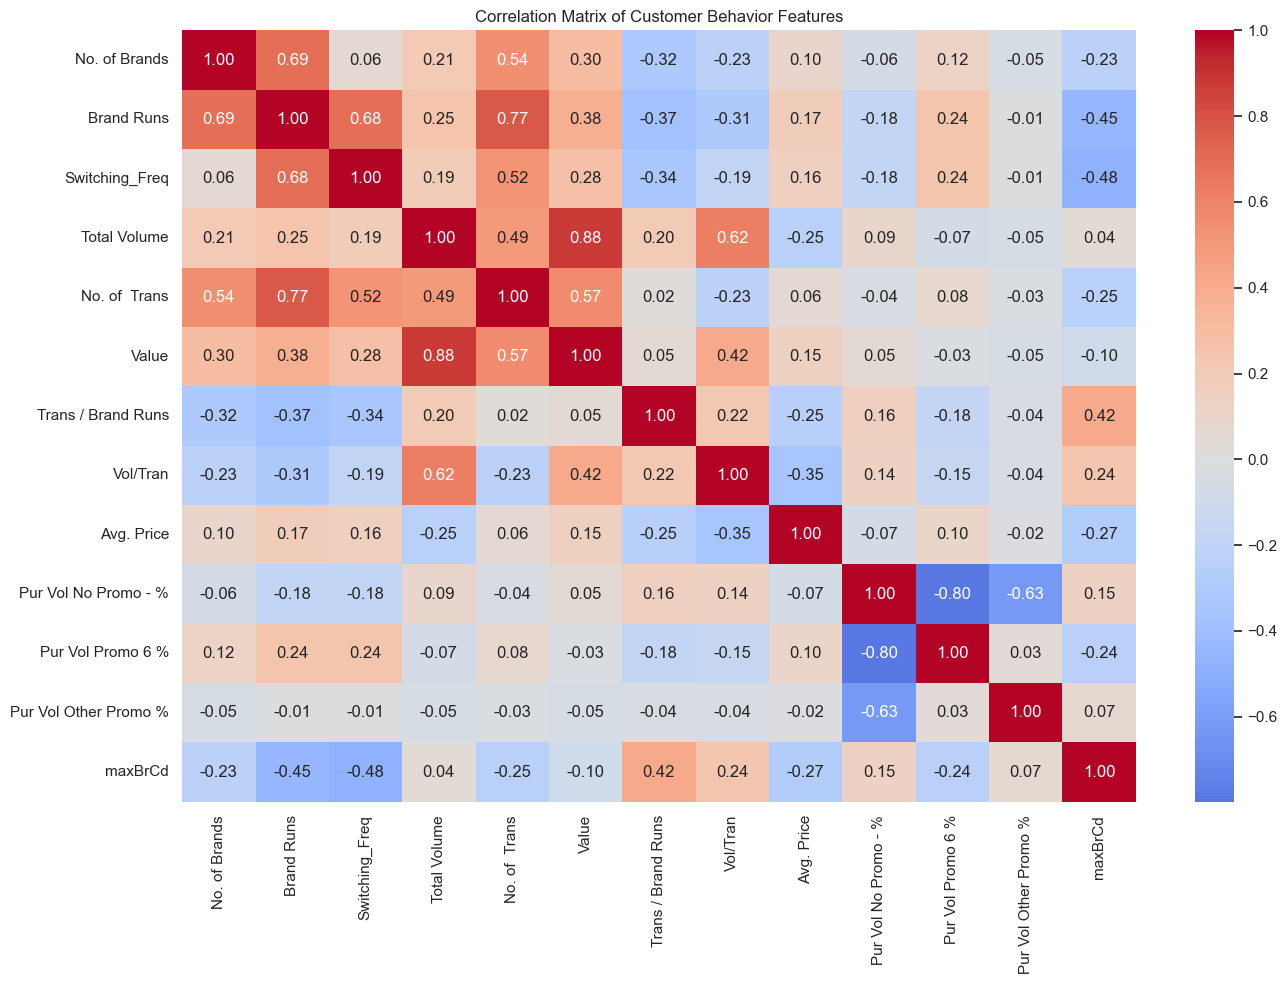

In [50]:
# Fix column name with trailing space
df.rename(columns={'Avg. Price ': 'Avg. Price'}, inplace=True)

# Select relevant behavioral features for correlation analysis
behavior_cols = [
    'No. of Brands', 'Brand Runs', 'Switching_Freq', 'Total Volume',
    'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
    'Avg. Price', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
    'Pur Vol Other Promo %', 'maxBrCd'
]

# Compute the correlation matrix
corr_matrix = df[behavior_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Customer Behavior Features')
plt.tight_layout()
# Save figure
plt.savefig("Correlation Matrix of Customer Behavior Features.png", dpi=300, bbox_inches='tight')

plt.show()


### Correlation Insights

1 **Brand Loyalty vs Switching**:
 - *maxBrCd* (Max Brand Share — proxy for brand loyalty) is **Negatively correlated** with *Switching_Freq* and *Brand Runs*
 - → Higher loyalty (larger *maxBrCd*) is strongly linked with **less switching** and **fewer brands tried**.
 - Makes sense: loyal customers tend to stick with one brand.

2 **Switching Behavior Drivers**:
  - *Switching_Freq* is **Strongly positively correlated** with Brand *Runs*
  - → Indicates that variety-seeking behavior and higher brand engagement are connected.

3 **Spending & Transaction Behavior**:
  - *Total Volume*, *No. of Trans*, and *Value* are Highly correlated with each other.
  - → Suggests that **high-spending customers** also have **more transactions** and **buy larger volumes**.  

4 **Promo Sensitivity**:
 - *Pur Vol Promo 6%* vs *Pur Vol No Promo - %*: **Strong negative correlation (-0.80)**
  - → Customers who buy on promo **buy less at regular price**, and vice versa.
 - *maxBrCd* is **negatively correlated with promo variables**
  - → Suggests that **promo-driven shoppers are less brand loyal**.


## 6. K-Means clustering

### Step-by-Step Plan for Clustering

#### 1. Select Clustering Features
Based on EDA, the following features are ideal for clustering:

- **Brand Behavior:**  
  - *No. of Brands*, *Brand Runs*, *maxBrCd*

- **Promo Sensitivity:**  
  - *Pur Vol No Promo %*, *Pur Vol Promo 6 %*, *Pur Vol Other Promo %*

- **Purchase Behavior:**  
  - *No. of Trans*, *Value*, *Avg. Price*


#### 2. Preprocessing
- Standardize (scale) features — essential for K-Means clustering
- Check for **multicollinearity** among input features


#### 3. Find Optimal **k**
- Use the **Elbow Method** to identify the ideal number of clusters (likely between 2–5)


#### 4. Run K-Means
- Fit the model on selected features
- Assign cluster labels to each household


#### 5. Profile the Clusters
- Calculate **mean values per feature** for each cluster
- Interpret segments based on brand loyalty, promo sensitivity, and purchase behavior


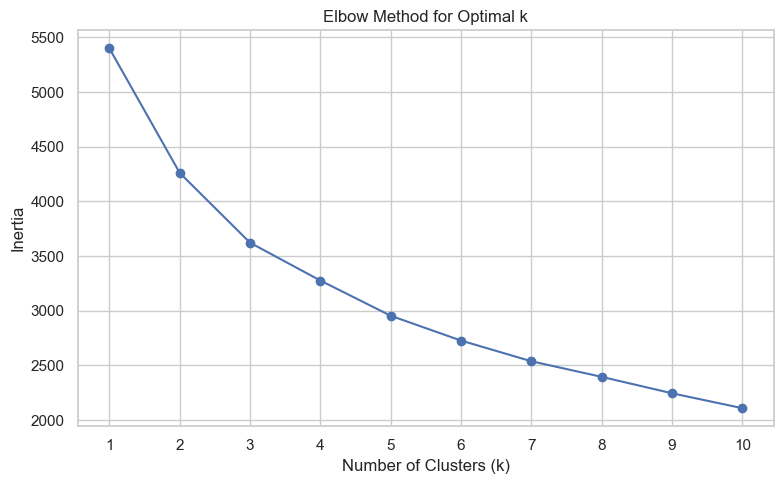

In [51]:
# Import necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak*")

# Select features for clustering
cluster_features = [
    'No. of Brands', 'Brand Runs', 'No. of  Trans', 'Value',
    'Avg. Price', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'maxBrCd'
     
]

# Scale features
df_cluster = df[cluster_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
# Save figure
plt.savefig("Elbow Method for Optimal k.png", dpi=300, bbox_inches='tight')

plt.show()


In [58]:
from sklearn.metrics import silhouette_score
import numpy as np

# Fit KMeans for k=3 and k=4
k_values = [3, 4]
kmeans_models = {}
labels_dict = {}
silhouette_scores = {}
cluster_profiles = {}

# Test K=3 and K=4
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    #df_temp = df_cluster.copy()
    df_temp = df.copy()
    df_temp['Cluster'] = labels
    profile = df_temp.groupby('Cluster').mean().round(2)
    cluster_profiles[k] = profile
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

# Display profiles
print("\n--- Silhouette Scores ---")
print(silhouette_scores)

'''
print("\n--- K=3 Cluster Profiles ---")
print(cluster_profiles[3])

print("\n--- K=4 Cluster Profiles ---")
print(cluster_profiles[4])
'''


--- Silhouette Scores ---
{3: np.float64(0.22333861338741504), 4: np.float64(0.16756946284741386)}


'\nprint("\n--- K=3 Cluster Profiles ---")\nprint(cluster_profiles[3])\n\nprint("\n--- K=4 Cluster Profiles ---")\nprint(cluster_profiles[4])\n'

In [59]:
# Save profiles to Excel
with pd.ExcelWriter("Cluster_Profiles.xlsx") as writer:
    cluster_profiles[3].to_excel(writer, sheet_name="K=3")
    cluster_profiles[4].to_excel(writer, sheet_name="K=4")

### Silhouette Scores

- **k = 3:**  
  - Silhouette Score = **0.223**  
  - → Indicates **better-defined clusters** with clearer separation

- **k = 4:**  
  - Silhouette Score = **0.167**  
  - → **weaker separation** and more **overlap between clusters**


### Visualizations of clusters (2D plots using PCA)

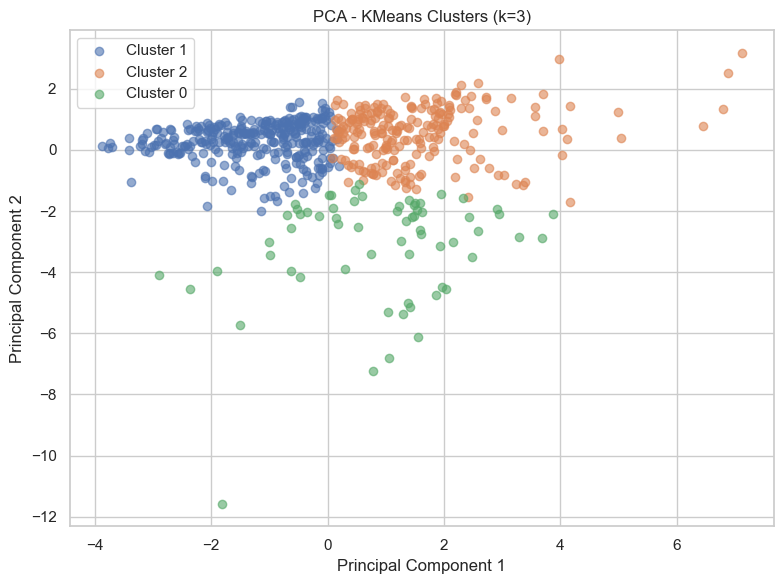

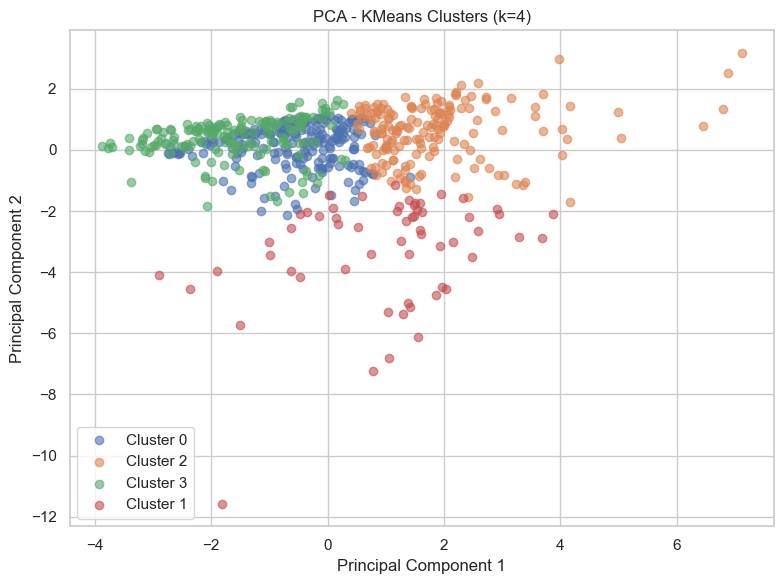

In [60]:

from sklearn.decomposition import PCA

labels_dict = {}

for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_dict[k] = kmeans.fit_predict(X_scaled)
    
# Run PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create dataframes for plotting
df_pca_k3 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_k3["Cluster"] = labels_dict[3]

df_pca_k4 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_k4["Cluster"] = labels_dict[4]

# Plot PCA for K=3
plt.figure(figsize=(8, 6))
for cluster in df_pca_k3["Cluster"].unique():
    subset = df_pca_k3[df_pca_k3["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)
plt.title("PCA - KMeans Clusters (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Save figure
plt.savefig("PCA - KMeans Clusters-K-3.png", dpi=300, bbox_inches='tight')

plt.show()

# Plot PCA for K=4
plt.figure(figsize=(8, 6))
for cluster in df_pca_k4["Cluster"].unique():
    subset = df_pca_k4[df_pca_k4["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)
plt.title("PCA - KMeans Clusters (k=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Save figure
plt.savefig("PCA - KMeans Clusters-K-4.png", dpi=300, bbox_inches='tight')

plt.show()


### K = 3 Clusters
- Shows **three fairly distinct groups**, with only some overlap
- Good separation along **PC1 and PC2 axes** (from dimensionality reduction)
- Supports our earlier decision that **k = 3 is a strong choice**

### K = 4 Clusters
- Clusters appear **less distinct**, with noticeable overlap between at least two groups
- Matches the **lower silhouette score**, suggesting that **k = 4 might over-segment** the population


## Labeling the Clusters with Meaningful Names

In [61]:
# Define cluster names for K=3
cluster_names = {
    0: "Heavy Buyers / Variety Seekers",
    1: "Switchers / Promo Shoppers",
    2: "Loyalists"
}

# Recreate the k=3 clustering and apply labels
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
#df_cluster_k3 = df_cluster.copy()
df_cluster_k3 = df.copy()
df_cluster_k3["Cluster"] = kmeans_k3.fit_predict(X_scaled)
df_cluster_k3["Segment"] = df_cluster_k3["Cluster"].map(cluster_names)

# Preview the labeled dataset
df_cluster_k3.head()


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,maxBrCd,Switching_Freq,Cluster,Segment
0,1010010,4,3,10,1,4,4,2,4,1,...,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.376947,5.666667,1,Switchers / Promo Shoppers
1,1010020,3,2,10,2,2,4,4,2,1,...,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.144902,5.000000,2,Loyalists
2,1014020,2,3,10,2,4,5,6,4,1,...,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.545455,7.400000,2,Loyalists
3,1014030,4,0,0,0,4,0,0,5,0,...,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.600000,2.000000,1,Switchers / Promo Shoppers
4,1014190,4,1,10,2,3,4,4,3,1,...,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.144578,2.000000,0,Heavy Buyers / Variety Seekers


### Cluster Labels & Segment Profiles

Cluster labels have been successfully applied! Here's a summary of the segments:

#### Loyalists
- **Low switching**
- **High brand loyalty (*maxBrCd*)**
- **Barely use promotions**
- Likely stable, brand-loyal households


#### Switchers / Promo Shoppers
- **Low loyalty**
- **High promo usage**
- Tend to switch brands frequently, often influenced by discounts


#### Heavy Buyers / Variety Seekers
- **High purchase volume**
- **Many brands purchased**
- **Low loyalty**
- May enjoy trying new products or purchase for larger/more diverse households


In [62]:
# Save the labeled k=3 clustered dataset to an Excel file
output_path = "Clustered_Households_K3_Labeled.xlsx"
df_cluster_k3.to_excel(output_path, index=False)

output_path


'Clustered_Households_K3_Labeled.xlsx'

## 7. Build a classification model to predict customer segments

### Goal

Train a supervised model (e.g. Random Forest, Logistic Regression, XGBoost) to predict the **segment label** (*Loyalists*, *Switchers*, etc.) using demographic inputs to classify new or unseen households.

### Step-by-Step Plan for Segment Classification

#### 1. Define Target and Features
- **Target:**  
  - *Segment* (Cluster label: Loyalist, Switcher, Variety Seeker)

- **Features:**  
  Include demographic inputs:
  - *SEC*, *FEH*, *Affluence Index*, *AGE*, *SEX*, *EDU*, *MT*, *HS*, *CHILD*, *CS*


#### 2. Split & Train
- Perform **train-test split** (e.g., 80/20)
- Train initial model — start with *RandomForestClassifier*


#### 3. Evaluate
- Use metrics like:
  - **Accuracy**
  - **Classification Report** (Precision, Recall, F1)
- Analyze **Feature Importance** to understand key drivers of segment classification


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

demograghic_cols = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index'] 
target = 'Cluster'

# Split into train/test
X = df_cluster_k3[demograghic_cols]
y = df_cluster_k3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape


((480, 10), (120, 10))

- **Features selected**: demographic inputs

- **Target**: Cluster

- **Train/Test Split**: 480 training rows, 120 test rows

- **Scaled**: All features are standardized


### Random Forest, Logistic Regression and XGBoost Classifiers

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Train models
rf = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_scaled, y_train)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42).fit(X_train_scaled, y_train)

# Predictions
rf_preds = rf.predict(X_test_scaled)
lr_preds = lr.predict(X_test_scaled)
xgb_preds = xgb.predict(X_test_scaled)

# Evaluate
models = {'Random Forest': rf_preds, 'Logistic Regression': lr_preds, 'XGBoost': xgb_preds}

class_names = ['Heavy Buyers / Variety Seekers', 'Switchers / Promo Shoppers', 'Loyalists']

results = {}
for name, preds in models.items():
    #print(f"\n {name}")
    #print("Accuracy:", accuracy_score(y_test, preds))
    report = classification_report(y_test, preds, target_names=class_names, output_dict=True)
    results[name] = {"Accuracy": accuracy_score(y_test, preds), "classification_report": report}
    
for model, metrics in results.items():
    print(f" {model} Accuracy: {metrics['Accuracy']:.4f}")
    display(pd.DataFrame(metrics["classification_report"]).transpose())

 Random Forest Accuracy: 0.5333


,precision,recall,f1-score,support
Heavy Buyers / Variety Seekers,0.222222,0.166667,0.190476,12.000000
Switchers / Promo Shoppers,0.611111,0.666667,0.637681,66.000000
Loyalists,0.461538,0.428571,0.444444,42.000000
accuracy,0.533333,0.533333,0.533333,0.533333
macro avg,0.431624,0.420635,0.424201,120.000000
weighted avg,0.519872,0.533333,0.525328,120.000000


 Logistic Regression Accuracy: 0.5500


,precision,recall,f1-score,support
Heavy Buyers / Variety Seekers,0.000000,0.000000,0.000000,12.00
Switchers / Promo Shoppers,0.589744,0.696970,0.638889,66.00
Loyalists,0.487805,0.476190,0.481928,42.00
accuracy,0.550000,0.550000,0.550000,0.55
macro avg,0.359183,0.391053,0.373606,120.00
weighted avg,0.495091,0.550000,0.520064,120.00


 XGBoost Accuracy: 0.5667


,precision,recall,f1-score,support
Heavy Buyers / Variety Seekers,0.333333,0.250000,0.285714,12.000000
Switchers / Promo Shoppers,0.642857,0.681818,0.661765,66.000000
Loyalists,0.487805,0.476190,0.481928,42.000000
accuracy,0.566667,0.566667,0.566667,0.566667
macro avg,0.487998,0.469336,0.476469,120.000000
weighted avg,0.557636,0.566667,0.561217,120.000000


### Overfitting check

#### Use Cross-Validation (K-Fold)

In [65]:
from sklearn.model_selection import cross_val_score

X_scaled = scaler.fit_transform(X)

scores_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
print("RF_Cross-validated accuracy: ", scores_rf.mean())

scores_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
print("LR_Cross-validated accuracy: ", scores_lr.mean())

scores_xgb = cross_val_score(xgb, X_scaled, y, cv=5, scoring='accuracy')
print("XGB_Cross-validated accuracy: ", scores_xgb.mean())

RF_Cross-validated accuracy:  0.4666666666666666
LR_Cross-validated accuracy:  0.5416666666666667
XGB_Cross-validated accuracy:  0.4683333333333334


#### Train/Test Performance Gap

In [66]:
from sklearn.metrics import accuracy_score

rf_train_acc = accuracy_score(y_train, rf.predict(X_train_scaled))
rf_test_acc  = accuracy_score(y_test, rf.predict(X_test_scaled))

print(f"RF Train accuracy: {rf_train_acc:.4f}")
print(f"RF Test accuracy : {rf_test_acc:.4f}")

lr_train_acc = accuracy_score(y_train, lr.predict(X_train_scaled))
lr_test_acc  = accuracy_score(y_test, lr.predict(X_test_scaled))

print(f"LR Train accuracy: {lr_train_acc:.4f}")
print(f"LR Test accuracy : {lr_test_acc:.4f}")

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train_scaled))
xgb_test_acc  = accuracy_score(y_test, xgb.predict(X_test_scaled))

print(f"XGB Train accuracy: {xgb_train_acc:.4f}")
print(f"XGB Test accuracy : {xgb_test_acc:.4f}")

RF Train accuracy: 0.9729
RF Test accuracy : 0.5333
LR Train accuracy: 0.5729
LR Test accuracy : 0.5500
XGB Train accuracy: 0.9688
XGB Test accuracy : 0.5667


**Logistic regression model generalize better**

### Feature importance

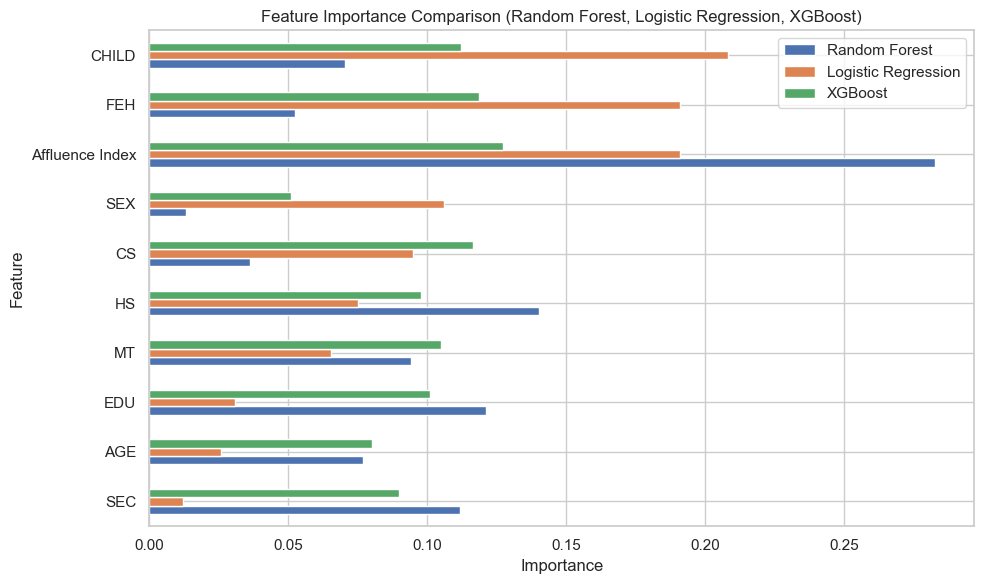

In [67]:
# Generate feature importance for trained models
import numpy as np

# Feature names
feature_names = X.columns.tolist()

# Random Forest feature importance
rf_importance = rf.feature_importances_

# Logistic Regression absolute coefficient importance
lr_importance = np.abs(lr.coef_).mean(axis=0)

# XGBoost feature importance
xgb_importance = xgb.feature_importances_

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Random Forest": rf_importance,
    "Logistic Regression": lr_importance,
    "XGBoost": xgb_importance
}).set_index("Feature")

# Normalize importances to make them comparable
importance_df_normalized = importance_df.div(importance_df.sum(axis=0), axis=1)

# Compute average importance across models
importance_df_normalized["Average"] = importance_df_normalized.mean(axis=1)

# Select top 10 features based on average importance
top_features = importance_df_normalized.sort_values("Average", ascending=False).head(10)

# Drop the "Average" column before plotting
top_features = top_features.drop(columns="Average")


# Plot
top_features.sort_values("Logistic Regression", ascending=True).plot.barh(figsize=(10, 6))
plt.title("Feature Importance Comparison (Random Forest, Logistic Regression, XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
# Save figure
plt.savefig("Feature Importance Comparison.png", dpi=300, bbox_inches='tight')

plt.show()


## 8.Save the trained models

In [68]:
import joblib

# Save models to files
joblib.dump(rf, "random_forest_segment_model.pkl")
joblib.dump(lr, "logistic_regression_segment_model.pkl")
joblib.dump(xgb, "XGB_segment_model.pkl")
joblib.dump(scaler, "scaler_for_models.pkl")

[
    "random_forest_segment_model.pkl",
    "logistic_regression_segment_model.pkl",
    "XGB_segment_model.pkl",
    "scaler_for_models.pkl"
]


['random_forest_segment_model.pkl',
 'logistic_regression_segment_model.pkl',
 'XGB_segment_model.pkl',
 'scaler_for_models.pkl']